# 反向传播推导(迭代)

In [1]:
import torch
import matplotlib.pyplot as plt

## 定义线性方程 
 - 我的预测的线形方式是 $$y = 2x + 1$$
 - 为了简化我们只求w，也就是假设b是已知的 $$y' = wx + 1$$
 - 定义需要预测的线形方程 linreg

In [2]:
def linreg(x,w):
    return w*x + 1

## 定义损失函数(最小二乘法)

 $$ L = \frac{1}{2}(y'-y)^2 $$

In [3]:
def squared_loss(h_hat,y):
    return (h_hat-y)**2/2

## 随机梯度下降

In [4]:
def sgd(w, lr): 
    with torch.no_grad():
        w -= lr * w.grad 
        w.grad.zero_()

## 用深度学习中术语重新整理赋值

In [5]:
net = linreg
loss = squared_loss
learn_rate = 0.1 #学习率
num_epochs = 5   # 训练轮数

# 初始化训练数据集
 - 真实的w是2
 - 目标函数是 $$ y = 2x + 1 $$
 - 我们的训练数据集x = [1,2,3,4,5] 
 - 带入目标函数的结果 y = [3,5,7,9,11]
 - 预测的w初始可以是随机的
 - torch.rand(1)从区间[0,1)的均匀分布中随机抽取一个随机数生成一个张量

In [6]:
true_w = torch.tensor(2)
w = torch.rand(1, dtype=torch.float64, requires_grad=True) # requires_grad=True 代表自动求导

In [7]:
def synthetic_data(w, num_examples): 
    X = torch.arange(1,num_examples+1)
    y = X*w + 1
    return X, y

In [8]:
features, labels = synthetic_data(true_w, num_epochs)

In [9]:
features

tensor([1, 2, 3, 4, 5])

In [10]:
labels

tensor([ 3,  5,  7,  9, 11])

## 初始数据的坐标图
 > (1,3) , (2,5) , (3,7) , (4,9) ,(5,11)

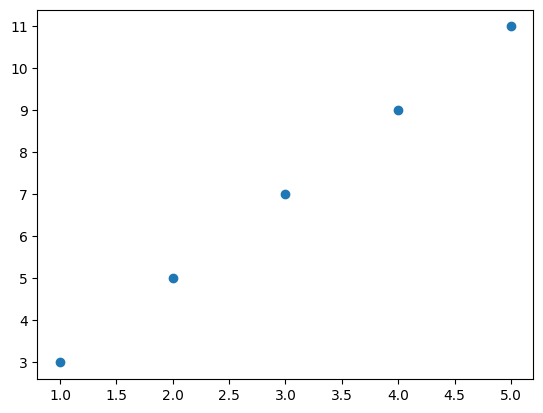

In [11]:
plt.scatter(features, labels )

## “训练”

In [12]:
for i in range(num_epochs):
    l = loss(net(features[i], w), labels[i]) 
    print(f"epoch {i + 1}, l {l}")
    l.backward()
    sgd(w, learn_rate) # 使用参数的梯度更新参数
    print(f'epoch {i + 1}, w {w}')
        
            

epoch 1, l tensor([0.9658], dtype=torch.float64, grad_fn=<DivBackward0>)
epoch 1, w tensor([0.7492], dtype=torch.float64, requires_grad=True)
epoch 2, l tensor([3.1291], dtype=torch.float64, grad_fn=<DivBackward0>)
epoch 2, w tensor([1.2495], dtype=torch.float64, requires_grad=True)
epoch 3, l tensor([2.5346], dtype=torch.float64, grad_fn=<DivBackward0>)
epoch 3, w tensor([1.9250], dtype=torch.float64, requires_grad=True)
epoch 4, l tensor([0.0451], dtype=torch.float64, grad_fn=<DivBackward0>)
epoch 4, w tensor([2.0450], dtype=torch.float64, requires_grad=True)
epoch 5, l tensor([0.0253], dtype=torch.float64, grad_fn=<DivBackward0>)
epoch 5, w tensor([1.9325], dtype=torch.float64, requires_grad=True)


In [13]:
w

tensor([1.9325], dtype=torch.float64, requires_grad=True)

## 通过得到训练后的w带入方程，得到训练后方程预测的坐标

In [14]:
test_x = features
test_y = w.detach()*features + 1
w.detach()

tensor([1.9325], dtype=torch.float64)

## 将训练数据集和预测数据集放在一个图里

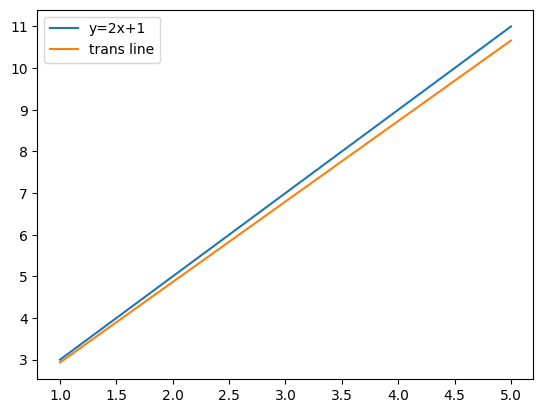

In [15]:
labels_arr = torch.cat((labels.reshape((-1,1)),test_y.reshape((-1,1))),dim=1)
plt.plot(features,labels_arr.numpy())
plt.legend(["y=2x+1","trans line"])

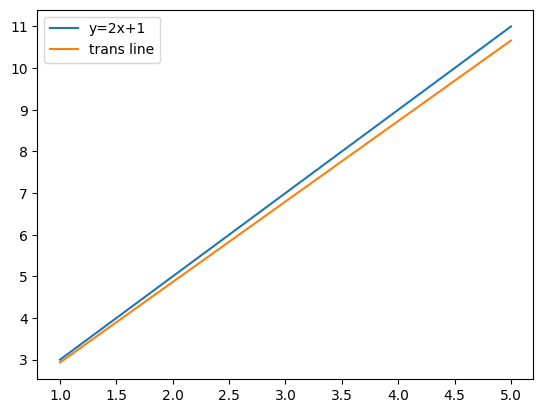

In [16]:
plt.plot(features,labels)
plt.plot(test_x,test_y)
plt.legend(["y=2x+1","trans line"])